# SQL 문법

## 1. 심화 문법

### ORDER BY절

* 결과가 출력되는 순서를 조절하는 역할
* **ASC**: Ascending, 오름차순으로 정렬
* **DESC**: Descending, 내림차순으로 정렬
* 생략시에는 디폴트값인 오름차순으로 정렬된다.
* OREDR BY절은 WHERE절과 함께 사용 가능하다.

In [ ]:
# 데뷔 일자가 빠른 순서대로 조회
SELECT mem_id, mem_name, debut_date
FROM member
ORDER BY debut_date;

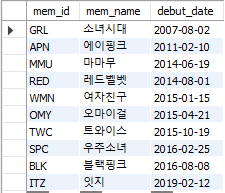

In [ ]:
# 내림차순
SELECT mem_id, mem_name, debut_date
FROM member
ORDER BY debut_date DESC;

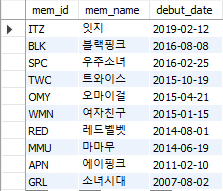

In [ ]:
# 키가 164이상인 회원들을 내림차순으로 정렬
# ORDER BY절은 WHERE절 다음에 위치해야 한다
SELECT mem_id, mem_name, debut_date, height
FROM member
WHERE height >= 164
ORDER BY height DESC;

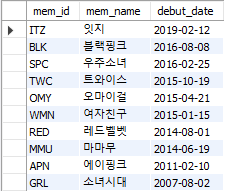

* SELECT문에 나오는 절은 생략 가능하지만, 사용해야 한다면 순서를 지켜야 한다.

In [ ]:
# 여러개의 정렬기준, 평균 키가 큰 순서대로 정렬하되, 평균 키가 같으면 데뷔이ㅣㄹ자가 빠른 순서로 정렬
SELECT mem_id, mem_name, debut_date, height
FROM member
WHERE height >= 164
ORDER BY height DESC, debut_date ASC;

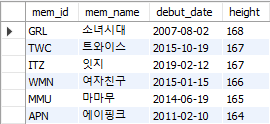

### LIMIT

* 출력의 개수를 제한할 수 있다.
* 개수를 제한 해서 보여줄 수 있으며, 보통 ORDER BY절과 함께 사용된다.

In [ ]:
# 회원 테이블을 조회 시, 전체 중 앞에서 3건만 조회
SELECT *
FROM member
LIMIT 3;

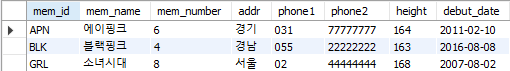

* LIMIT 시작, 개수: LIMIT 개수 OFFSET 시작이라고 쓰는 것과 동일하다.
* LIMIT는 첫 데이터를 0번으로 설정하고 시작함

In [ ]:
# 중간부터 출력, 키가 큰 순으로 정렬하되, 3번째부터 2건만 조회하기
SELECT mem_name, height
FROM member
ORDER BY height DESC
LIMIT 3, 2;

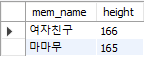

### DISTINCT

* 중복된 것을 1개만 남겨 보여준다.
* 열 이름 앞에 붙여주면 된다.

In [ ]:
# 회원들의 지역을 중복없이 출력
SELECT DISTINCT addr
FROM member;

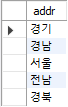

## GROUP BY절

* 그룹을 묶어주는 역할을 한다.
* 집계함수는 주로 GROUP BY절과 함께 쓰이며 데이터를 그룹화 해주는 기능을 한다.

|함수명|설명|
|---|---|
|SUM()|합계를 구한다.|
|AVG()|평균을 구한다.|
|MIN()|최소값을 구한다.|
|MAX()|최대값을 구한다.|
|COUNT()|행의 개수를 센다.|
|COUNT(DISTINCT)|행의 개수를 세되, 중복은 1개만 인정한다.|

In [ ]:
# 각 회원별로 구매한 개수를 합쳐서 출력 -> 집계함수인 SUM()과 GROUP BY절 사용
# GROUP BY로 회원별로 묶어준 후, SUM()함수로 구매한 개수를 합치면 된다.
SELECT mem_id, sum(amount)
FROM buy
GROUP BY mem_id;

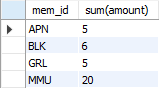

In [ ]:
# 별칭 사용
# 별칭에 작은 따옴표를 사용해도 되지만, 작은 따옴표는 INSERT등에서 문자를 입력할 때 사용하므로 별칭에는 큰 따옴표를 사용하는 것이 권장됨
SELECT mem_id "회원 아이디" , sum(amount) "총 구매 개수"
FROM buy
GROUP BY mem_id;

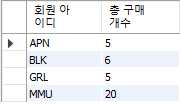

In [ ]:
# 회원의 구매한 금액의 총합 가격(price) * 수량이고, 회원을 '회원 아이디'로 변경
SELECT mem_id "회원 아이디", SUM(price * amount) "총 구매 금액"
FROM buy
GROUP BY mem_id;

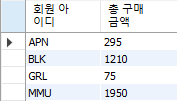

In [ ]:
# 전체 회원이 구매한 물품 개수(amount)의 평균
SELECT AVG(amount) "평균 구매 횟수"
FROM buy;

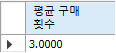

In [ ]:
# 회원 별로 한 번 구매시 평균 몇 개를 구매했는지 조회
SELECT mem_id, AVG(amount) "평균 구매 횟수"
FROM buy
GROUP BY mem_id;

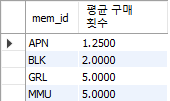

In [ ]:
# 회원 테이블에서 연략처가 있는 회원의 수 카운트
# 연락처가 있는 회원을 카운트하려면, 국번(phone1) 또는 전화번호(phone2)의 열 이름을 지정해줘야 함
# NULL값인 항목은 제외하고 카운트하여 연락처만 있는 회원의 인원만 출력된다.
SELECT COUNT(phone1) "연락처가 있는 회원"
FROM member;

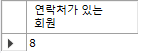

* COUNT(*): 모든 행의 개수를 센다.
* COUNT(열_이름): 열 이름의 값이 NULL인 것을 제외한 행의 개수를 센다.

### HAVING 절

* WHERE절과 비슷한 개념으로 조건을 제한하는 역할
* 집계 함수에 대해 조건을 제한하는 것으로 이해할 수 있다.
* GROUP BY와 관련된 조건절은 HAVING절을 사용해야 한다.
* 보통 GROUP BY 다음에 나온다.

In [ ]:
# 회원별 총 구매액
SELECT mem_id "회원 아이디", SUM(price * amount) "총 구매 금액"
FROM buy
GROUP BY mem_id;

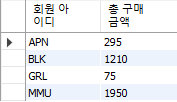

In [ ]:
# where절을 사용하여 조건을 제한할때 오류 발생
SELECT mem_id "회원 아이디", SUM(price * amount) "총 구매 금액"
FROM buy
WHERE SUM(price * amount) > 1000
GROUP BY mem_id;

In [ ]:
# HAVING절을 사용하여 집계 함수에 대해 조건을 제한해 주면 된다
SELECT mem_id "회원 아이디", SUM(price * amount) "총 구매 금액"
FROM buy
GROUP BY mem_id
HAVING SUM(price * amount) > 1000;

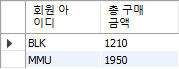

In [ ]:
# 총 구매액이 큰 사용자부터 출력
SELECT mem_id "회원 아이디", SUM(price * amount) "총 구매 금액"
FROM buy
GROUP BY mem_id
HAVING SUM(price * amount) > 1000
ORDER BY SUM(price * amount) DESC;

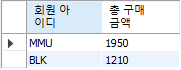